Import all required packages for this to run.

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
# !git clone --branch server_version https://github.com/DanielP520/sequence_logo_project.git
# %cd sequence_logo_project
# !pip install logomaker

In [2]:

import os.path
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import argparse
import pdb_parser
import pandas as pd
import glob
from scipy.spatial import KDTree
from sklearn.cluster import KMeans
import math
import logomaker
import numpy as np
import helper_functions
import sequence_logo_main
%matplotlib notebook


def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))



In [3]:

# target_chain = input("Type the chain identifier for your target: ")
# binder_chain = input("Type the chain identifier for your binders: ")
# is_ligand = input("Is your target a ligand? [Y/N]: ")

# if is_ligand == "Y":
#     is_ligand = True
#     residues = "all"

# else:
#     is_ligand = False
#     residues = input("Type the residues in the target you'd like to visualize separated by a comma (ex: 1,232,3123,2,5,7), or type all to visualize all residues :): ")
#     if not residues == "all":
#         residues = [int(x) for x in residues.split(",")]



In [4]:
# configure_plotly_browser_state()
df_target,df_binder = sequence_logo_main.plot("models", "B","A", False, [int(x) for x in'232,456,758,756,759,800,1027,1085'.split(",")] )

In [5]:
sequence_logo_input = input("Enter residues index to generate sequence logos: separated by comas: ")
sequence_logo_residues =[int(x) for x in sequence_logo_input.split(",")]

Enter residues index to generate sequence logos: separated by comas: 232,456,758,756,759,800,1027,1085


<IPython.core.display.Javascript object>


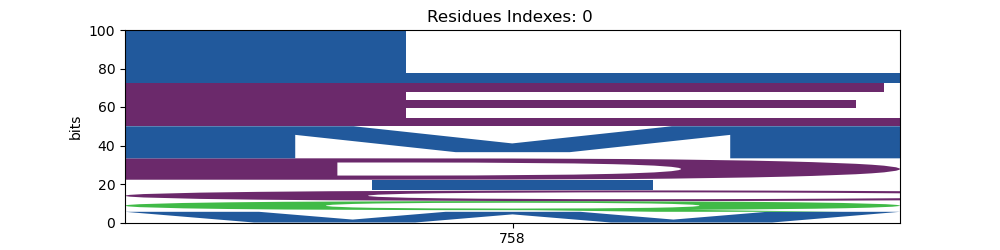

<IPython.core.display.Javascript object>


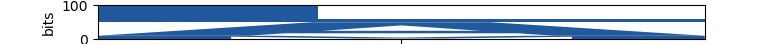

<IPython.core.display.Javascript object>


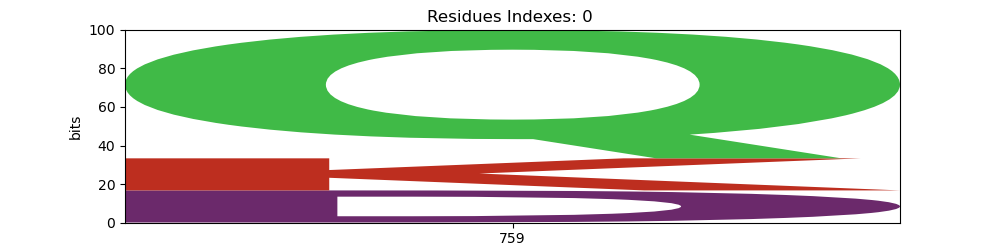

<IPython.core.display.Javascript object>


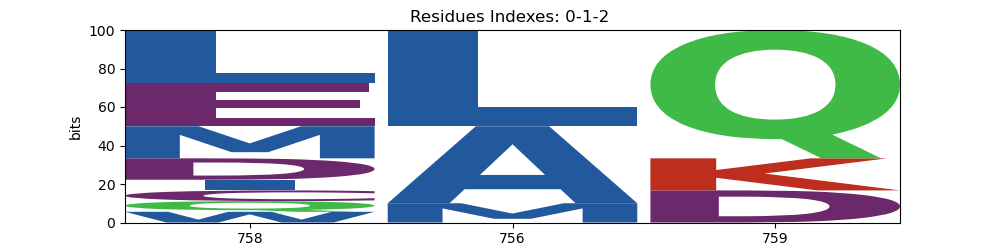

ValueError: 
    Invalid element(s) received for the 'data' property of 
        Invalid elements include: [<logomaker.src.Logo.Logo object at 0x000002B504CBFEB0>]

    The 'data' property is a tuple of trace instances
    that may be specified as:
      - A list or tuple of trace instances
        (e.g. [Scatter(...), Bar(...)])
      - A single trace instance
        (e.g. Scatter(...), Bar(...), etc.)
      - A list or tuple of dicts of string/value properties where:
        - The 'type' property specifies the trace type
            One of: ['bar', 'barpolar', 'box', 'candlestick',
                     'carpet', 'choropleth', 'choroplethmapbox',
                     'cone', 'contour', 'contourcarpet',
                     'densitymapbox', 'funnel', 'funnelarea',
                     'heatmap', 'heatmapgl', 'histogram',
                     'histogram2d', 'histogram2dcontour', 'icicle',
                     'image', 'indicator', 'isosurface', 'mesh3d',
                     'ohlc', 'parcats', 'parcoords', 'pie',
                     'pointcloud', 'sankey', 'scatter',
                     'scatter3d', 'scattercarpet', 'scattergeo',
                     'scattergl', 'scattermapbox', 'scatterpolar',
                     'scatterpolargl', 'scattersmith',
                     'scatterternary', 'splom', 'streamtube',
                     'sunburst', 'surface', 'table', 'treemap',
                     'violin', 'volume', 'waterfall']

        - All remaining properties are passed to the constructor of
          the specified trace type

        (e.g. [{'type': 'scatter', ...}, {'type': 'bar, ...}])

In [6]:
sequence_logo_main.sequence_logos(df_target,df_binder, sequence_logo_residues)